<a href="https://colab.research.google.com/github/Ahmethan96/Data_science/blob/main/Energy_analysis_of_wind_turbine_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
import glob
from datetime import datetime
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pwd

/content


In [4]:
data_frame = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/AL_WIND_07_12.xlsx', index_col= 'DateTime')
data_frame.head(10)

,Air temperature | ('C),Pressure | (atm),Wind speed | (m/s),Wind direction | (deg),Power generated by system | (kW)
DateTime,,,,,
2007-01-01 00:00:00,10.926,0.979103,9.014,229,33688.10
2007-01-01 01:00:00,9.919,0.979566,9.428,232,37261.90
2007-01-01 02:00:00,8.567,0.979937,8.700,236,30502.90
2007-01-01 03:00:00,7.877,0.980053,8.481,247,28419.20
2007-01-01 04:00:00,7.259,0.979867,8.383,256,27370.30
2007-01-01 05:00:00,6.570,0.979884,8.256,261,25805.90
2007-01-01 06:00:00,5.897,0.980318,6.476,265,11546.80
2007-01-01 07:00:00,5.109,0.980597,5.906,271,8360.76
2007-01-01 08:00:00,4.413,0.980711,5.557,269,6426.64


Setting an index in a DataFrame serves several important purposes in data analysis:

Data Labeling: The index provides a way to uniquely label and identify rows in the DataFrame. It acts as a row identifier and allows for efficient and direct access to specific rows based on their index values.

Enhanced Data Retrieval: Setting an index improves data retrieval performance, especially for large datasets. When an index is defined, Pandas can quickly locate and access rows based on index values, making data retrieval more efficient.

Data Alignment: When performing operations between two DataFrames or when joining DataFrames, having a well-defined index ensures that data aligns correctly. Pandas aligns data based on the index, making it easier to combine and manipulate data from different sources.

Time Series Data: For time series data, setting a datetime index allows for time-based operations, resampling, and slicing based on specific time periods.

Grouping and Aggregating Data: An index can be used for grouping data based on specific criteria, and it allows for efficient data aggregation using functions like groupby.

Data Integrity: Having a unique index helps maintain data integrity, ensuring that rows are uniquely identifiable and preventing duplicate or ambiguous entries.

Merging and Joining Data: When merging or joining multiple DataFrames, setting a common index allows for easy and accurate data alignment.

Hierarchical Indexing: Setting a multi-level index (hierarchical index) enables organizing and working with higher-dimensional data, providing a more structured representation of the data.

In summary, setting an index in a DataFrame is a fundamental step in data analysis that allows for efficient data retrieval, data alignment, grouping, and various data manipulation operations. It improves the overall usability and integrity of the data, making it easier to work with and analyze.

In [5]:
data_frame.dtypes

Air temperature | ('C)              float64
Pressure | (atm)                    float64
Wind speed | (m/s)                  float64
Wind direction | (deg)                int64
Power generated by system | (kW)    float64
dtype: object

In [6]:
data_frame.index.dtype

dtype('<M8[ns]')

**dtype('<M8[ns]')** is the NumPy representation of a 64-bit datetime data type with nanosecond precision, which is the format used by pandas to store datetime values in the 'DateTime' index of your DataFrame.

In [7]:
data_frame['Power generated by system | (kW)'].replace(0, np.nan, inplace= True)


In [8]:
data_frame['Power generated by system | (kW)'].fillna(method= 'ffill', inplace= True)

In [9]:
data_frame.values[0]

array([1.09260e+01, 9.79103e-01, 9.01400e+00, 2.29000e+02, 3.36881e+04])

In [10]:
data_frame.values

array([[ 1.09260e+01,  9.79103e-01,  9.01400e+00,  2.29000e+02,
         3.36881e+04],
       [ 9.91900e+00,  9.79566e-01,  9.42800e+00,  2.32000e+02,
         3.72619e+04],
       [ 8.56700e+00,  9.79937e-01,  8.70000e+00,  2.36000e+02,
         3.05029e+04],
       ...,
       [ 3.01500e+00,  9.93726e-01,  1.59000e+00,  3.50000e+01,
         1.56125e+03],
       [-3.17000e-01,  9.93483e-01,  2.01200e+00,  4.50000e+01,
         1.56125e+03],
       [-1.04800e+00,  9.93414e-01,  2.13200e+00,  3.90000e+01,
         1.56125e+03]])

In [13]:
print(len(dataset))
data_frame.shape

52560


(52560, 5)

'method='ffill': This parameter specifies the fill method, which is set to 'ffill', indicating that forward fill should be used. Forward fill propagates the last valid observation forward to fill the missing values.

In [12]:
dataset = data_frame.values
train_size = int(len(dataset) * 0.7)
print(train_size)

36792


In [ ]:
test_size = len(dataset) - train_size
print(test_size)

In [15]:
dataset.dtype

dtype('float64')

In [16]:
dataset[0].dtype

dtype('float64')

In [17]:
dataset[0]

array([1.09260e+01, 9.79103e-01, 9.01400e+00, 2.29000e+02, 3.36881e+04])

In [18]:
dataset[0][0]

10.926

In [19]:
dataset[0][0].dtype

dtype('float64')

In [20]:
x = dataset[0 : train_size] # 70 % of the data 36792 instances
print(len(x))

z = print((test_size))      # 30 % of the data 15768 instances
                            # data shape is (52560, 5) therefore, 36792 + 15768 = 52560 instances

36792
15768


In [21]:
train, test = dataset[0: train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

36792 15768


In [22]:
def create_dataset(dataset, look_back= 1):
  dataX, dataY = [], []
  for i in range(len(dataset) - look_back):
    a = dataset[i : (i + look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  print(len(dataY))
  return np.array(dataX), np.array(dataY)



In [23]:
look_back = 8
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

36784
15760


In [24]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [25]:
model = Sequential()
model.add(LSTM(100, input_shape = (trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss= 'mae', optimizer= 'adam')
history = model.fit(trainX, trainY, epochs= 300, batch_size= 100, validation_data= (testX, testY), verbose= 0, shuffle= False)

In [26]:
yhat = model.predict(testX)


493/493 [==============================] - 3s 3ms/step


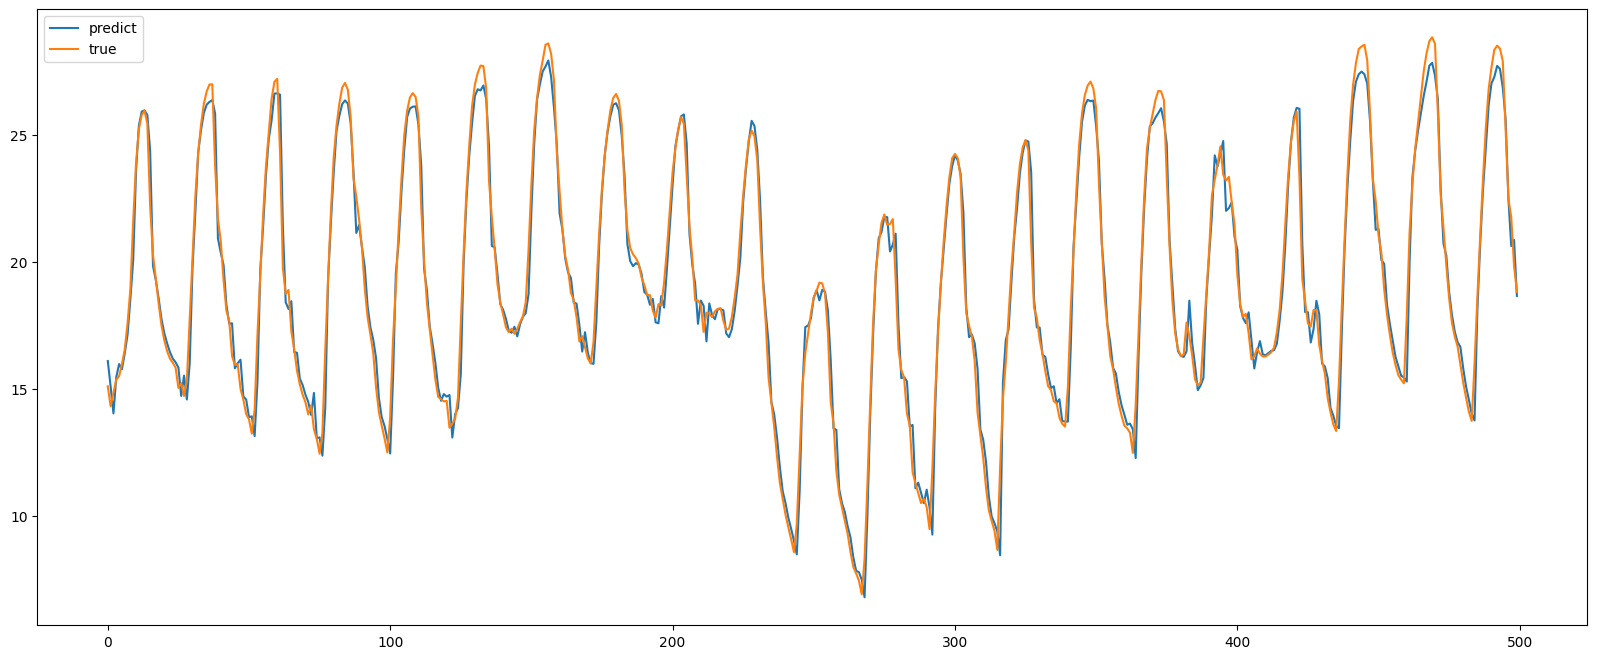

In [27]:
pyplot.figure(figsize= (20, 8))
pyplot.plot(yhat[:500], label= 'predict')
pyplot.plot(testY[:500], label= 'true')
pyplot.legend()
pyplot.show()


In [30]:
print(trainX)

[[[10.926  9.919  8.567 ...  6.57   5.897  5.109]]

 [[ 9.919  8.567  7.877 ...  5.897  5.109  4.413]]

 [[ 8.567  7.877  7.259 ...  5.109  4.413  3.754]]

 ...

 [[16.655 17.163 19.131 ... 22.61  23.353 24.012]]

 [[17.163 19.131 20.736 ... 23.353 24.012 24.298]]

 [[19.131 20.736 21.622 ... 24.012 24.298 23.852]]]


In [33]:
trainX.dtype


dtype('float64')

In [34]:
trainX.ndim

3

In [45]:
trainX.shape[1]

1

In [46]:
trainX.shape[2]

8

In [36]:
trainX.shape

(36784, 1, 8)

In [43]:
trainX[0]

array([[10.926,  9.919,  8.567,  7.877,  7.259,  6.57 ,  5.897,  5.109]])

In [42]:
trainX

array([[[10.926,  9.919,  8.567, ...,  6.57 ,  5.897,  5.109]],

       [[ 9.919,  8.567,  7.877, ...,  5.897,  5.109,  4.413]],

       [[ 8.567,  7.877,  7.259, ...,  5.109,  4.413,  3.754]],

       ...,

       [[16.655, 17.163, 19.131, ..., 22.61 , 23.353, 24.012]],

       [[17.163, 19.131, 20.736, ..., 23.353, 24.012, 24.298]],

       [[19.131, 20.736, 21.622, ..., 24.012, 24.298, 23.852]]])

In [55]:
from keras.layers.rnn import GRU
model.add(GRU(100 ,  input_shape = (trainX.shape[0], trainX.shape[1])))
model.compile(loss= 'mae', optimizer= 'adam')
history = model.fit(trainX, trainY, epochs= 300, batch_size= 100, validation_data= (testX, testY), verbose= 0, shuffle= False)


ValueError: ignored